# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
import warnings
warnings.filterwarnings("ignore")

Load feature names.

In [2]:
feature_names = []
feature_junk = []
feature_index = []

with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)
        feature_junk.append(junk)
        feature_index.append(index)

print('Loaded feature names:', len(feature_names))
print(feature_names)
#print(feature_junk)
#print(feature_index)

Loaded feature names: 126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-colo

Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

print(train_data)
#print(train_labels[0])

(7000, 126) (1124, 126)
[[ 0.  0.  1. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  1.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

In [4]:
#def P1():
### STUDENT START ###
n_comp = 125
pca_mod = PCA(n_components = n_comp)
pca_mod.fit(train_data, train_labels)

#plt.figure(figsize=(12, 6))
#plt.subplot(1, 1, 1)
#plt.plot(pca_mod.explained_variance_ratio_)

header = ["Principal Component", "Fraction of Variance explained"]
row_format ="{:>25}" * (len(header))
print(row_format.format(*header))
print('     --------------------------------------------------')
list1 = [0, 0]
fraction = 0.0
for i in range(0, 50):
    fraction += pca_mod.explained_variance_ratio_[i]
    list1[0] = i;
    list1[1] = np.round(fraction, 4)
    print(row_format.format(*list1))

### STUDENT END ###

#P1()

      Principal ComponentFraction of Variance explained
     --------------------------------------------------
                        0                    0.164
                        1                   0.2973
                        2                    0.399
                        3                   0.4696
                        4                   0.5083
                        5                   0.5451
                        6                   0.5764
                        7                   0.6037
                        8                   0.6299
                        9                   0.6522
                       10                   0.6727
                       11                   0.6914
                       12                   0.7087
                       13                   0.7256
                       14                   0.7408
                       15                   0.7558
                       16                   0.7701
                     

explained variance ratio (first two components): [ 0.16404331  0.13323479]


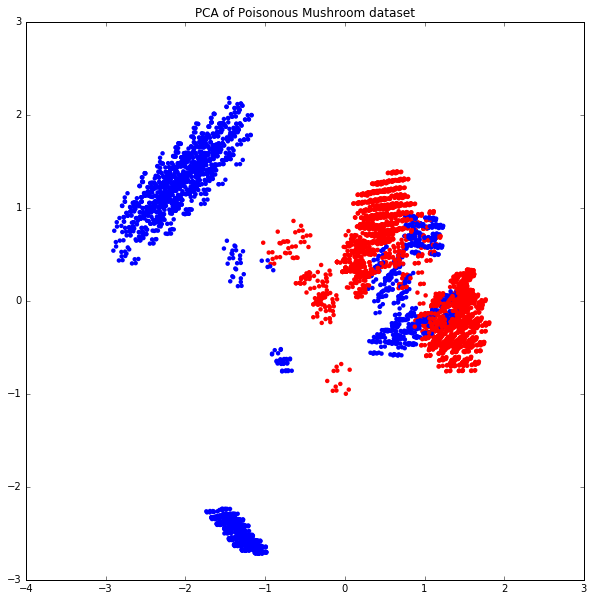

In [5]:
#def P2():
### STUDENT START ###
X = train_data
y = train_labels
#target_names = iris.target_names

n_comp = 2
pca_mod = PCA(n_components = n_comp)
target_names = ["Non-Poisonous", "Poisonous"]
X_r = pca_mod.fit(train_data, train_labels).transform(train_data)

#print(X_r.shape)

# Percentage of variance explained for each component
print('explained variance ratio (first two components): %s'
      % str(pca_mod.explained_variance_ratio_))
color = np.where(train_labels == 1, 'blue', 'red')
targetname = np.where(train_labels == 1, "Poisonous", "Non-Poisonous")
plt.figure(figsize=(10, 10))
plt.scatter(X_r[:,0], X_r[:,1], c=color, label=targetname, s = 20, edgecolor='')
   
#plt.legend()
plt.title('PCA of Poisonous Mushroom dataset')

### STUDENT END ###

#P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

In [7]:
def P3(X_r):
    #color = 'black'
    N = 16
    plt.figure(figsize=(20, 40))
    #plt.scatter(X_r[:,0], X_r[:,1], c=color, s = 20, edgecolor='')
    
    # Total size of the figure proportional to N (3 subfigures per row)
    #plt.figure(figsize = (5*min(N,3), 5*int(np.ceil(N/3.))))
    for n in range(1,17):
        # Set number of clusters and initialize them
        km = KMeans(n_clusters=n, init='k-means++', max_iter=1)
        # Fit to the data
        clstrs = km.fit (X_r)
        # Each cluster will be plotted in a different color
        # I use one of the qualitative color palettes in matplotlib, equally spaced
        #Colors = plt.cm.Set1(np.linspace(0, 1, n))
        color1 = 'black'
        color2 = 'blue'
        # Each color is represented by 4 (RGBA) coordinates
        #ClstrColors = np.empty(4*X_r.shape[0]).reshape(X_r.shape[0], 4)
        for i in np.arange (0, len(clstrs.labels_)):
            #color_index = clstrs.labels_[i]
            # Each color is indexed by the number of the cluster
            #ClstrColors[i,:] = Colors[color_index]
            # Plot each element in the dataset, each one with the color of the cluster it
                # belongs
            # n=1 in position (1,1), n=2 in position (1,2), n=3 in position (1,3), n=4 in
                # position (2,1), and so forth
            ax = plt.subplot(int(np.ceil(N/3.)), int(np.where(N/3>=1,3,n)), n)
            # Plot the observations of each cluster in its corresponding color
            plt.scatter (X_r[:,0], X_r[:,1], c = color1, alpha = 0.33, s=25, edgecolor='')
            # Plot a circle centered in the centroid of each cluster, and whose radius is the
                # distance from that centroid to the most distant point in the corresponding
                # cluster
        for j in range(n):
            # For each of the n clusters:
            # Calculate the radius
            radius = metrics.euclidean_distances(clstrs.cluster_centers_[j,:], X_r[clstrs.labels_==j]).max()
            # Set the circle
            circle=plt.Circle(tuple(clstrs.cluster_centers_[j,:]), radius, clip_on=True)
            # Use the color assigned to that cluster
            #circle.set_facecolor(Colors[j,:])  # 'None' for transparent background
            circle.set_facecolor('None') 
            # Make it transparent (a bit more than the elements in the cluster)
            circle.set_alpha(0.2)
            # To be able to differentiate between circles, make borders black
            circle.set_edgecolor('black')
            # Add the circle to the plot
            plt.gca().add_artist(circle)
    # Plot the centroid of each cluster
        plt.scatter (clstrs.cluster_centers_[:,0], clstrs.cluster_centers_[:,1], marker = 'x', c = 'black', s = 25)
        plt.title (str(n) + " cluster(s)")
        plt.xlabel("1st principal component")
        plt.ylabel("2nd principal component")
        plt.xlim([np.floor(X_r.min()), np.ceil(X_r.max())])
        plt.ylim([np.floor(X_r.min()), np.ceil(X_r.max())]) 
    plt.show()
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    #h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    #x_min, x_max = X_r[:, 0].min() - 1, X_r[:, 0].max() + 1
    #y_min, y_max = X_r[:, 1].min() - 1, X_r[:, 1].max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    #Z = Z.reshape(xx.shape)
    #plt.figure(1)
    #plt.clf()
    #plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired,
    #       aspect='auto', origin='lower')

    # Plot the centroids as a white X
    #centroids = clf.cluster_centers_
    #print("Centroids ", centroids)
    #plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=35, linewidths=2, color='w', zorder=10)
    #plt.title('K-means clustering on the Mushroom dataset (PCA-reduced data)\n' 'Centroids are marked with white cross')
    #plt.xlim(x_min, x_max)
    #plt.ylim(y_min, y_max)
    #plt.xticks(())
    #plt.yticks(())
    #plt.show()
   
#plt.legend()
#plt.title('PCA of Poisonous Mushroom dataset')

#P3()
#### PENDING:  1 - 16 clusters
#### PENDING:  Draw the Circle
### STUDENT START ###

n_comp = 2
pca_mod = PCA(n_components = n_comp)
X_r = pca_mod.fit_transform(train_data)

#clf = KMeans(n_clusters=10)
#predicted = clf.fit_predict(X_r)
P3(X_r)




### STUDENT END ###



ERROR! Session/line number was not unique in database. History logging moved to new session 104
Traceback (most recent call last):


ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.



  File "C:\Users\Sriram\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3066, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-66e3f7d1ef3b>", line 100, in <module>
    P3(X_r)
  File "<ipython-input-8-66e3f7d1ef3b>", line 31, in P3
    plt.scatter (X_r[:,0], X_r[:,1], c = color1, alpha = 0.33, s=25, edgecolor='')
  File "C:\Users\Sriram\Anaconda3\lib\site-packages\matplotlib\pyplot.py", line 3251, in scatter
    edgecolors=edgecolors, data=data, **kwargs)
  File "C:\Users\Sriram\Anaconda3\lib\site-packages\matplotlib\__init__.py", line 1811, in inner
    return func(ax, *args, **kwargs)
  File "C:\Users\Sriram\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 3923, in scatter
    self.autoscale_view()
  File "C:\Users\Sriram\Anaconda3\lib\site-packages\matplotlib\axes\_base.py", line 2197, in autoscale_view
    y0, y1 = ylocator.view_limits(y0, y1)
  File "C:\Users\Sriram\Anaconda3\lib\site-packages\matplotlib\tic


Unfortunately, your original traceback can not be constructed.



TypeError: 'NoneType' object is not iterable

KeyboardInterrupt: 

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

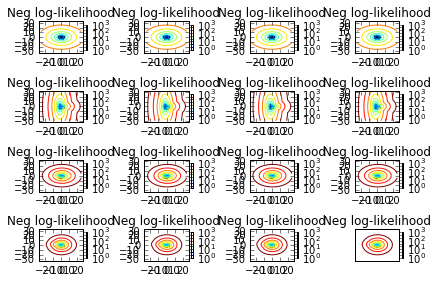

In [7]:
### STUDENT START ###
def P4(n_comp, covar_type, pltnum):
    np.random.seed(1)
    clf = GMM(n_components=n_comp)
    clf.fit(X_r) 
    GMM(covariance_type=covar_type, init_params='wmc', min_covar=0.001,
        n_components=2, n_init=1, n_iter=100, params='wmc',
        random_state=None, thresh=None, tol=0.001, verbose=0)
    #np.round(g.weights_, 2)

    # display predicted scores by the model as a contour plot
    x = np.linspace(-25.0, 25.0)
    y = np.linspace(-30.0, 30.0)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -clf.score_samples(XX)[0]
    Z = Z.reshape(X.shape)

    ax = plt.subplot(4,4, pltnum) 
    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),levels=np.logspace(0, 3, 10))
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    ax.scatter(X_r[:, 0], X_r[:, 1], .8)
    plt.title('Neg log-likelihood')
    
for i in range (0, 4):
    P4(i+1, 'spherical', ((i*4)+1))
    P4(i+1, 'diag', ((i*4)+2))
    P4(i+1, 'tied', ((i*4)+3))
    P4(i+1, 'full', ((i*4)+4))
    
#P4(2, 'spherical', 5)
#P4(2, 'diag', 6)
#P4(2, 'tied', 7)
#P4(2, 'full', 8)
#P4(3, 'spherical', 9)
#P4(3, 'diag', 10)
#P4(3, 'tied', 11)
#P4(3, 'full', 12)
#P4(4, 'spherical', 13)
#P4(4, 'diag', 14)
#P4(4, 'tied', 15)
#P4(4, 'full', 16)
plt.axis('tight')
plt.xticks(())
plt.yticks(())
plt.tight_layout()
plt.show()
### STUDENT END ###

#P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [19]:
#def P5():
### STUDENT START ###
np.random.seed(1)
n_comp = 2
pca_mod = PCA(n_components = n_comp)
X_train = pca_mod.fit_transform(train_data)
X_test = pca_mod.fit_transform(test_data)

clf_pos = GMM(covariance_type='full', n_components=4)
clf_pos.fit(X_train[train_labels==1])

clf_neg = GMM(covariance_type='full', n_components=4)
clf_neg.fit(X_train[train_labels==0]) 

prob_pos = clf_pos.score(X_test)
prob_neg = clf_neg.score(X_test)

test_prediction = np.where(prob_pos >= prob_neg, 1, 0)
print("Accuracy % is ", (metrics.accuracy_score(test_labels, test_prediction)*100))

#test_r = pca_mod.fit(test_data, test_labels).transform(test_data)
#clf.predict(test_r)
#print(clf.score(test_r, test_labels))
### STUDENT END ###

#P5()

Accuracy % is  51.2455516014


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [22]:
#def P6():
### STUDENT START ###
#PCA Component   GMM Component
#1               5      (try 4 covariances)
#2               4
#3               3
#4               2
#5               2
#6               2
#7               2
#8               2
#9               1
#10              1
#11              1
#12              1
#13              1

def runGMMExperiment(pca_ncomp, gmm_ncomp):
    covar_type = ['spherical', 'diag', 'tied', 'full']
    pca_mod = PCA(n_components = pca_ncomp)
    X_train = pca_mod.fit_transform(train_data)
    X_test = pca_mod.fit_transform(test_data)

    for j in range(0,4):
        clf_pos = GMM(covariance_type=covar_type[j], n_components=gmm_ncomp)
        clf_pos.fit(X_train[train_labels==1])

        clf_neg = GMM(covariance_type=covar_type[j], n_components=gmm_ncomp)
        clf_neg.fit(X_train[train_labels==0]) 

        prob_pos = clf_pos.score(X_test)
        prob_neg = clf_neg.score(X_test)

        test_prediction = np.where(prob_pos >= prob_neg, 1, 0)
        print("Parameters are ", pca_ncomp, gmm_ncomp, covar_type[j])
        print("Accuracy % is ", (metrics.accuracy_score(test_labels, test_prediction)*100))

PCA_ncomp = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
GMM_ncomp = [5,4,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
covar_type = ['spherical', 'diag', 'tied', 'full']

for i in range(0, 25):
    runGMMExperiment(PCA_ncomp[i], GMM_ncomp[i])



### STUDENT END ###

#P6()

Parameters are  1 5 spherical
Accuracy % is  69.3950177936
Parameters are  1 5 diag
Accuracy % is  69.3950177936
Parameters are  1 5 tied
Accuracy % is  68.7722419929
Parameters are  1 5 full
Accuracy % is  69.3060498221
Parameters are  2 4 spherical
Accuracy % is  72.2419928826
Parameters are  2 4 diag
Accuracy % is  66.5480427046
Parameters are  2 4 tied
Accuracy % is  60.3202846975
Parameters are  2 4 full
Accuracy % is  51.2455516014
Parameters are  3 3 spherical
Accuracy % is  60.5871886121
Parameters are  3 3 diag
Accuracy % is  56.1387900356
Parameters are  3 3 tied
Accuracy % is  61.1209964413
Parameters are  3 3 full
Accuracy % is  73.8434163701
Parameters are  4 2 spherical
Accuracy % is  56.0498220641
Parameters are  4 2 diag
Accuracy % is  78.2028469751
Parameters are  4 2 tied
Accuracy % is  83.4519572954
Parameters are  4 2 full
Accuracy % is  83.8078291815
Parameters are  5 2 spherical
Accuracy % is  57.4733096085
Parameters are  5 2 diag
Accuracy % is  80.7829181495
Par